In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import pickle
%matplotlib inline

In [4]:
startupData=pd.read_csv('/content/sample_data/50_Startups.csv')

In [ ]:
startupData.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
#Check for Missing data
startupData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
startupData.State.value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

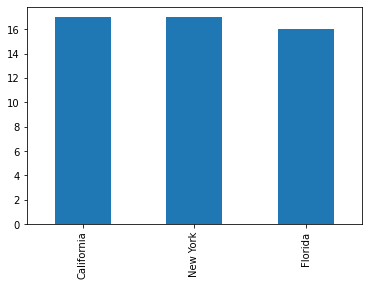

In [7]:
startupData.State.value_counts().plot(kind='bar')

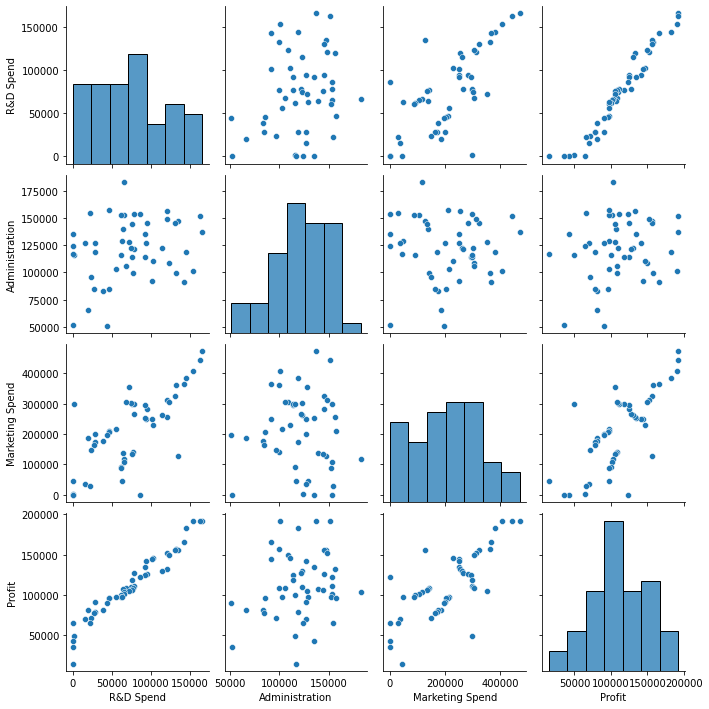

In [ ]:
sns.pairplot(startupData)

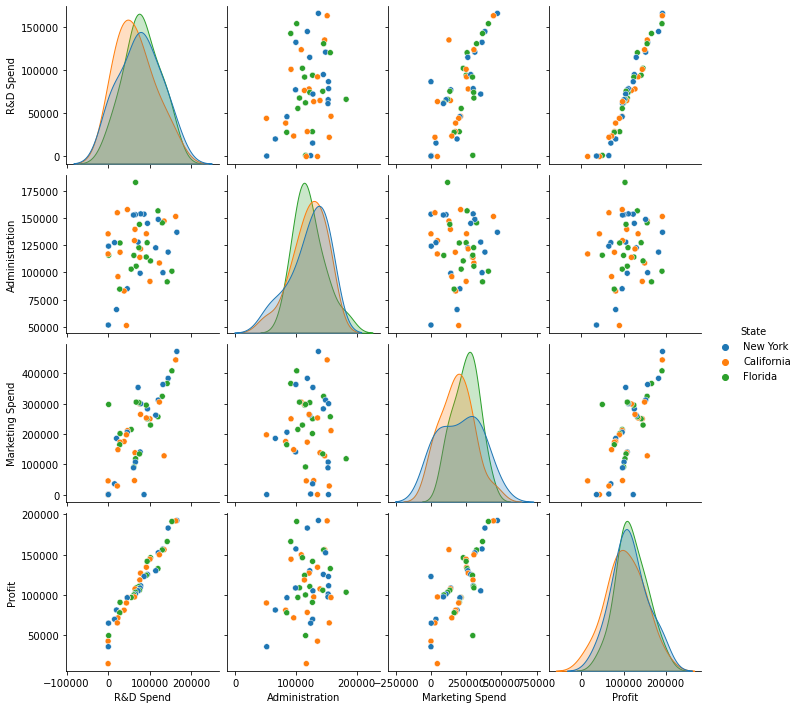

In [ ]:
sns.pairplot(startupData,hue="State")

In [ ]:
#Perform LinearRegression
#Check and ensure the features has a linear relationship
#To check the linear relationship there exists two methods
# 1. use corr() Statistical EDA (Understanding the data)
# 2. use pairplot() Visual EDA

#Feature Elimination using correlation analysis (Feature Engineering)
startupData.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


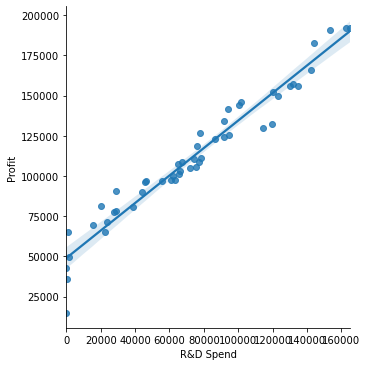

In [ ]:
#Vis for Regression Best Line 
sns.lmplot(x='R&D Spend',y='Profit', data=startupData)
#lmplot -> Liner Regression Model Plot

/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fi

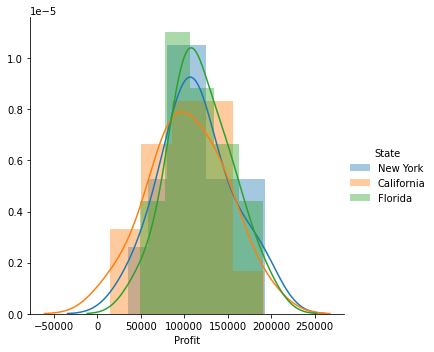

In [ ]:
#sns.histplot(startupData['Profit'],kde=True)
sns.FacetGrid(startupData,hue="State",height=5).map(sns.distplot,"Profit").add_legend()

/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fi

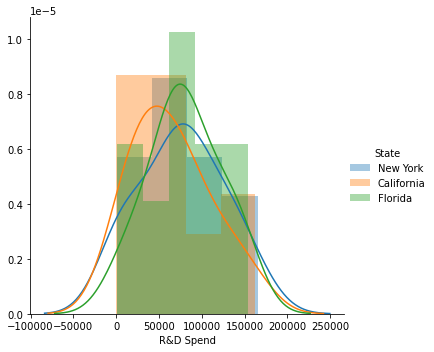

In [ ]:
#sns.histplot(startupData['Profit'],kde=True)
sns.FacetGrid(startupData,hue="State",height=5).map(sns.distplot,"R&D Spend").add_legend()

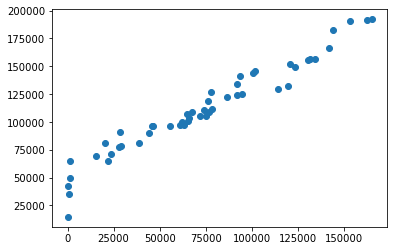

In [ ]:
plt.scatter(startupData['R&D Spend'], startupData.Profit)

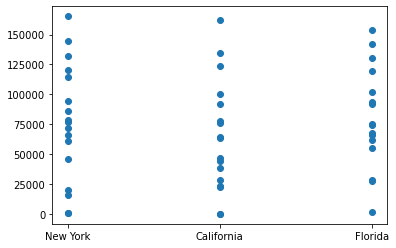

In [ ]:
plt.scatter(startupData.State,startupData['R&D Spend'])

<AxesSubplot:xlabel='R&D Spend', ylabel='Count'>

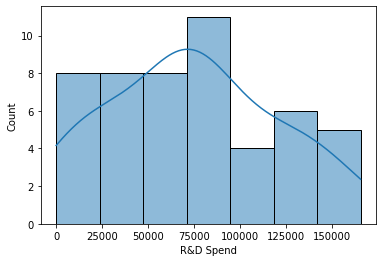

In [ ]:
sns.histplot(startupData['R&D Spend'],kde=True)

<AxesSubplot:xlabel='Profit', ylabel='Count'>

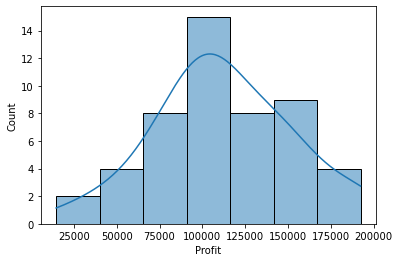

In [ ]:
sns.histplot(startupData['Profit'],kde=True)


In [ ]:
startupData.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<AxesSubplot:ylabel='Count'>

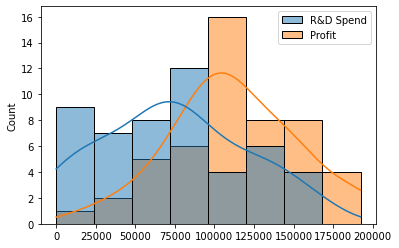

In [ ]:
sns.histplot([startupData['R&D Spend'],startupData['Profit']],kde=True)

In [ ]:
np.mean(startupData["Profit"])

112012.63920000002

In [ ]:
np.std(startupData["Profit"])

39901.08281667283

In [ ]:
np.percentile(startupData["Profit"],np.arange(0,100,25))

array([ 14681.4   ,  90138.9025, 107978.19  , 139765.9775])

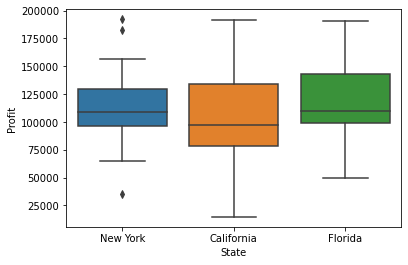

In [ ]:
sns.boxplot(x="State",y='Profit',data=startupData)
plt.show()

/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fi

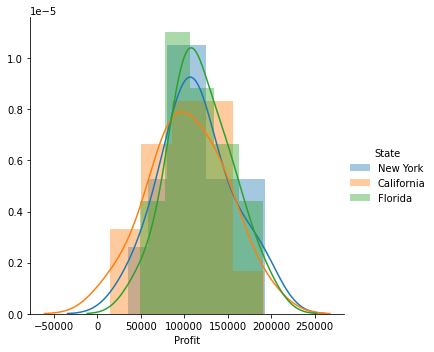

In [ ]:
#sns.histplot(startupData['Profit'],kde=True)
sns.FacetGrid(startupData,hue="State",height=5).map(sns.distplot,"Profit").add_legend()

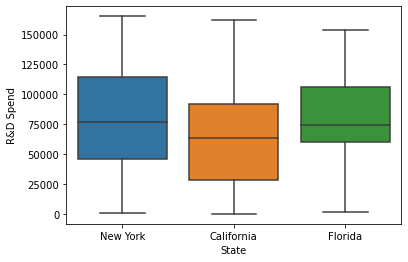

In [ ]:
sns.boxplot(x="State",y='R&D Spend',data=startupData)
plt.show()

In [ ]:
startupData.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [ ]:
#Seperate our data with features and label
#Since we are going to implement linear regression using sklearn, your features and label must be a 2d numpy array
#Sklearn expects your data to be in the form of Numpy Array

# Regression -- expected by SKLEARN !!!!
# Features and Label must a 2D array
features = startupData.iloc[:,0:4]
label = startupData.iloc[:,[4]]

In [ ]:
ct=make_column_transformer((OneHotEncoder(),["State"]),remainder = 'passthrough')
features = ct.fit_transform(features)

In [ ]:
#stateOHE = OneHotEncoder(categorical_features=[column which is label encoded])

#ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
#features = ct.fit_transform(features)

In [ ]:
#To Find best Score
for i in range(1,51):
    
    #Create Train Test Split
    # We will use Training Set to train our model
    # We will use Testing Set to check the quality of our model
    # Split Ratio - ?  (80-20, 70-30, 65-35 subject to your data size(data points))
    X_Train,X_Test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size = 0.2,
                                              random_state=i)
    #Create the model --- LinearRegression
    model=LinearRegression()
    #Training HAppens ---> Calculation of Coeff and intercept
    model.fit(X_Train,y_train)
    
    #Check the quality
    #Two Measures to check the quality
    # 1. Check whether the model is generalized model or not
    # 2. Check whether the model has sufficient accuracy score to approve the model (Statistics)

    # 1. Check whether the model is generalized model or not
    # training dataset score > testing dataset score --- Model is overfitted model (Model memorized data)
    # testing dataset score > training dataset score --- Model is Generalized Model
    training_score=model.score(X_Train,y_train)
    testing_score=model.score(X_Test,y_test)
    if testing_score > training_score:
        print("Training Score {} Testing Score {} for Random State {}".format(training_score,testing_score,i))

Training Score 0.942446542689397 Testing Score 0.9649618042060633 for Random State 1
Training Score 0.9398417195515445 Testing Score 0.9783259006626557 for Random State 2
Training Score 0.9473848999820091 Testing Score 0.9560357304860589 for Random State 4
Training Score 0.943850522642993 Testing Score 0.9669763022158512 for Random State 5
Training Score 0.9385918220043519 Testing Score 0.9901105113397809 for Random State 10
Training Score 0.9411603359254431 Testing Score 0.9726607102793833 for Random State 14
Training Score 0.946138584319559 Testing Score 0.9633877651310018 for Random State 21
Training Score 0.9425908513252554 Testing Score 0.9757906394981196 for Random State 22
Training Score 0.9464972114069966 Testing Score 0.9687727807395823 for Random State 24
Training Score 0.9454518446256155 Testing Score 0.9602561948870648 for Random State 26
Training Score 0.9482961316721963 Testing Score 0.9500997612784656 for Random State 29
Training Score 0.9435367947390881 Testing Score 0.

In [ ]:
X_Train,X_Test,y_train,y_test=train_test_split(features,label,test_size=0.2,random_state=10)

In [ ]:
finalModel=LinearRegression()
finalModel.fit(X_Train,y_train)

LinearRegression()

In [ ]:
print(finalModel.score(X_Train,y_train))
print(finalModel.score(X_Test,y_test))

0.9385918220043519
0.9901105113397809


In [ ]:
#Perform Prediction with unknown data
#Features --- R&D Spend, Administration , Marketing Spend, State
rdSpend = float(input("Enter R&D spend: "))
admSpend = float(input("Enter Administration spend: "))
marketingSpend = float(input("Enter Marketing Spend: "))
state = input("Enter State: ")

featureInput = np.array([[rdSpend,admSpend,marketingSpend,state]])
featureInput

Enter R&D spend: 0
Enter Administration spend: 0
Enter Marketing Spend: 0
Enter State: California


array([['0.0', '0.0', '0.0', 'California']], dtype='<U32')

In [ ]:
featureInputDF=pd.DataFrame(data=featureInput, index=np.arange(len(featureInput)),columns=["R&D Spend","Administration","Marketing Spend","State"])
featureInputDF

,R&D Spend,Administration,Marketing Spend,State
0,0.0,0.0,0.0,California


In [ ]:
#Applying OneHotEncoding
featureInputDF = ct.transform(featureInputDF)
featureInputDF

array([[1.0, 0.0, 0.0, '0.0', '0.0', '0.0']], dtype=object)

In [ ]:
profit = finalModel.predict(featureInputDF)
print("Predicted Profit is ",profit)

Predicted Profit is  [[50085.83835347]]


In [ ]:
model.coef_

array([[-1.01237702e+03,  8.50321913e+02,  1.62055111e+02,
         8.52849378e-01, -4.78130413e-02,  9.58775015e-03]])

In [ ]:
model.intercept_

array([51393.84375636])

In [ ]:
#Saving the Model and OHE
pickle.dump(finalModel,open("ProfitPredictionMode.model","wb"))
pickle.dump(ct,open("ColumnTransformer.ct","wb"))

In [ ]:
#Load the Model and OHE Encoder

savedCT=pickle.load(open("ColumnTransformer.ct","rb"))
savedProfitPredictionModel=pickle.load(open("ProfitPredictionMode.model","rb"))

In [ ]:
rdSpend = float(input("Enter R&D spend: "))
admSpend = float(input("Enter Administration spend: "))
marketingSpend = float(input("Enter Marketing Spend: "))
state = input("Enter State: ")

featureInput = np.array([[rdSpend,admSpend,marketingSpend,state]])
featureInputDF=pd.DataFrame(data=featureInput, index=np.arange(len(featureInput)),columns=["R&D Spend","Administration","Marketing Spend","State"])
featureInputDF = savedCT.transform(featureInputDF)
profit = savedProfitPredictionModel.predict(featureInputDF)
print("Predicted Profit is ",profit)

Enter R&D spend: 2345
Enter Administration spend: 2345
Enter Marketing Spend: 2345
Enter State: California
Predicted Profit is  [[51986.93957031]]


In [ ]:
#Attifitially create data
profit = savedProfitPredictionModel.predict(np.array([[1,0,0,2345,2345,2345]]))
profit

array([[51986.93957031]])

# Feature Elemination OLS Backward Elimination Technique